In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
#path.append('./../spineSimulator/')
#import plot
#from simulation_parameters import simulation_parameters

path.append('./../')
import spineSimulator
from spineSimulator import plot
from spineSimulator.simulation_parameters import simulation_parameters

#from importlib import reload
#reload(plot)

In [2]:
# text rendering with LaTex
#plt.rc('text', usetex=True)
#plt.rc('font', family='sans')

/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:411: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' for yi in ax.get_yticks() * 1.e9])
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid valu

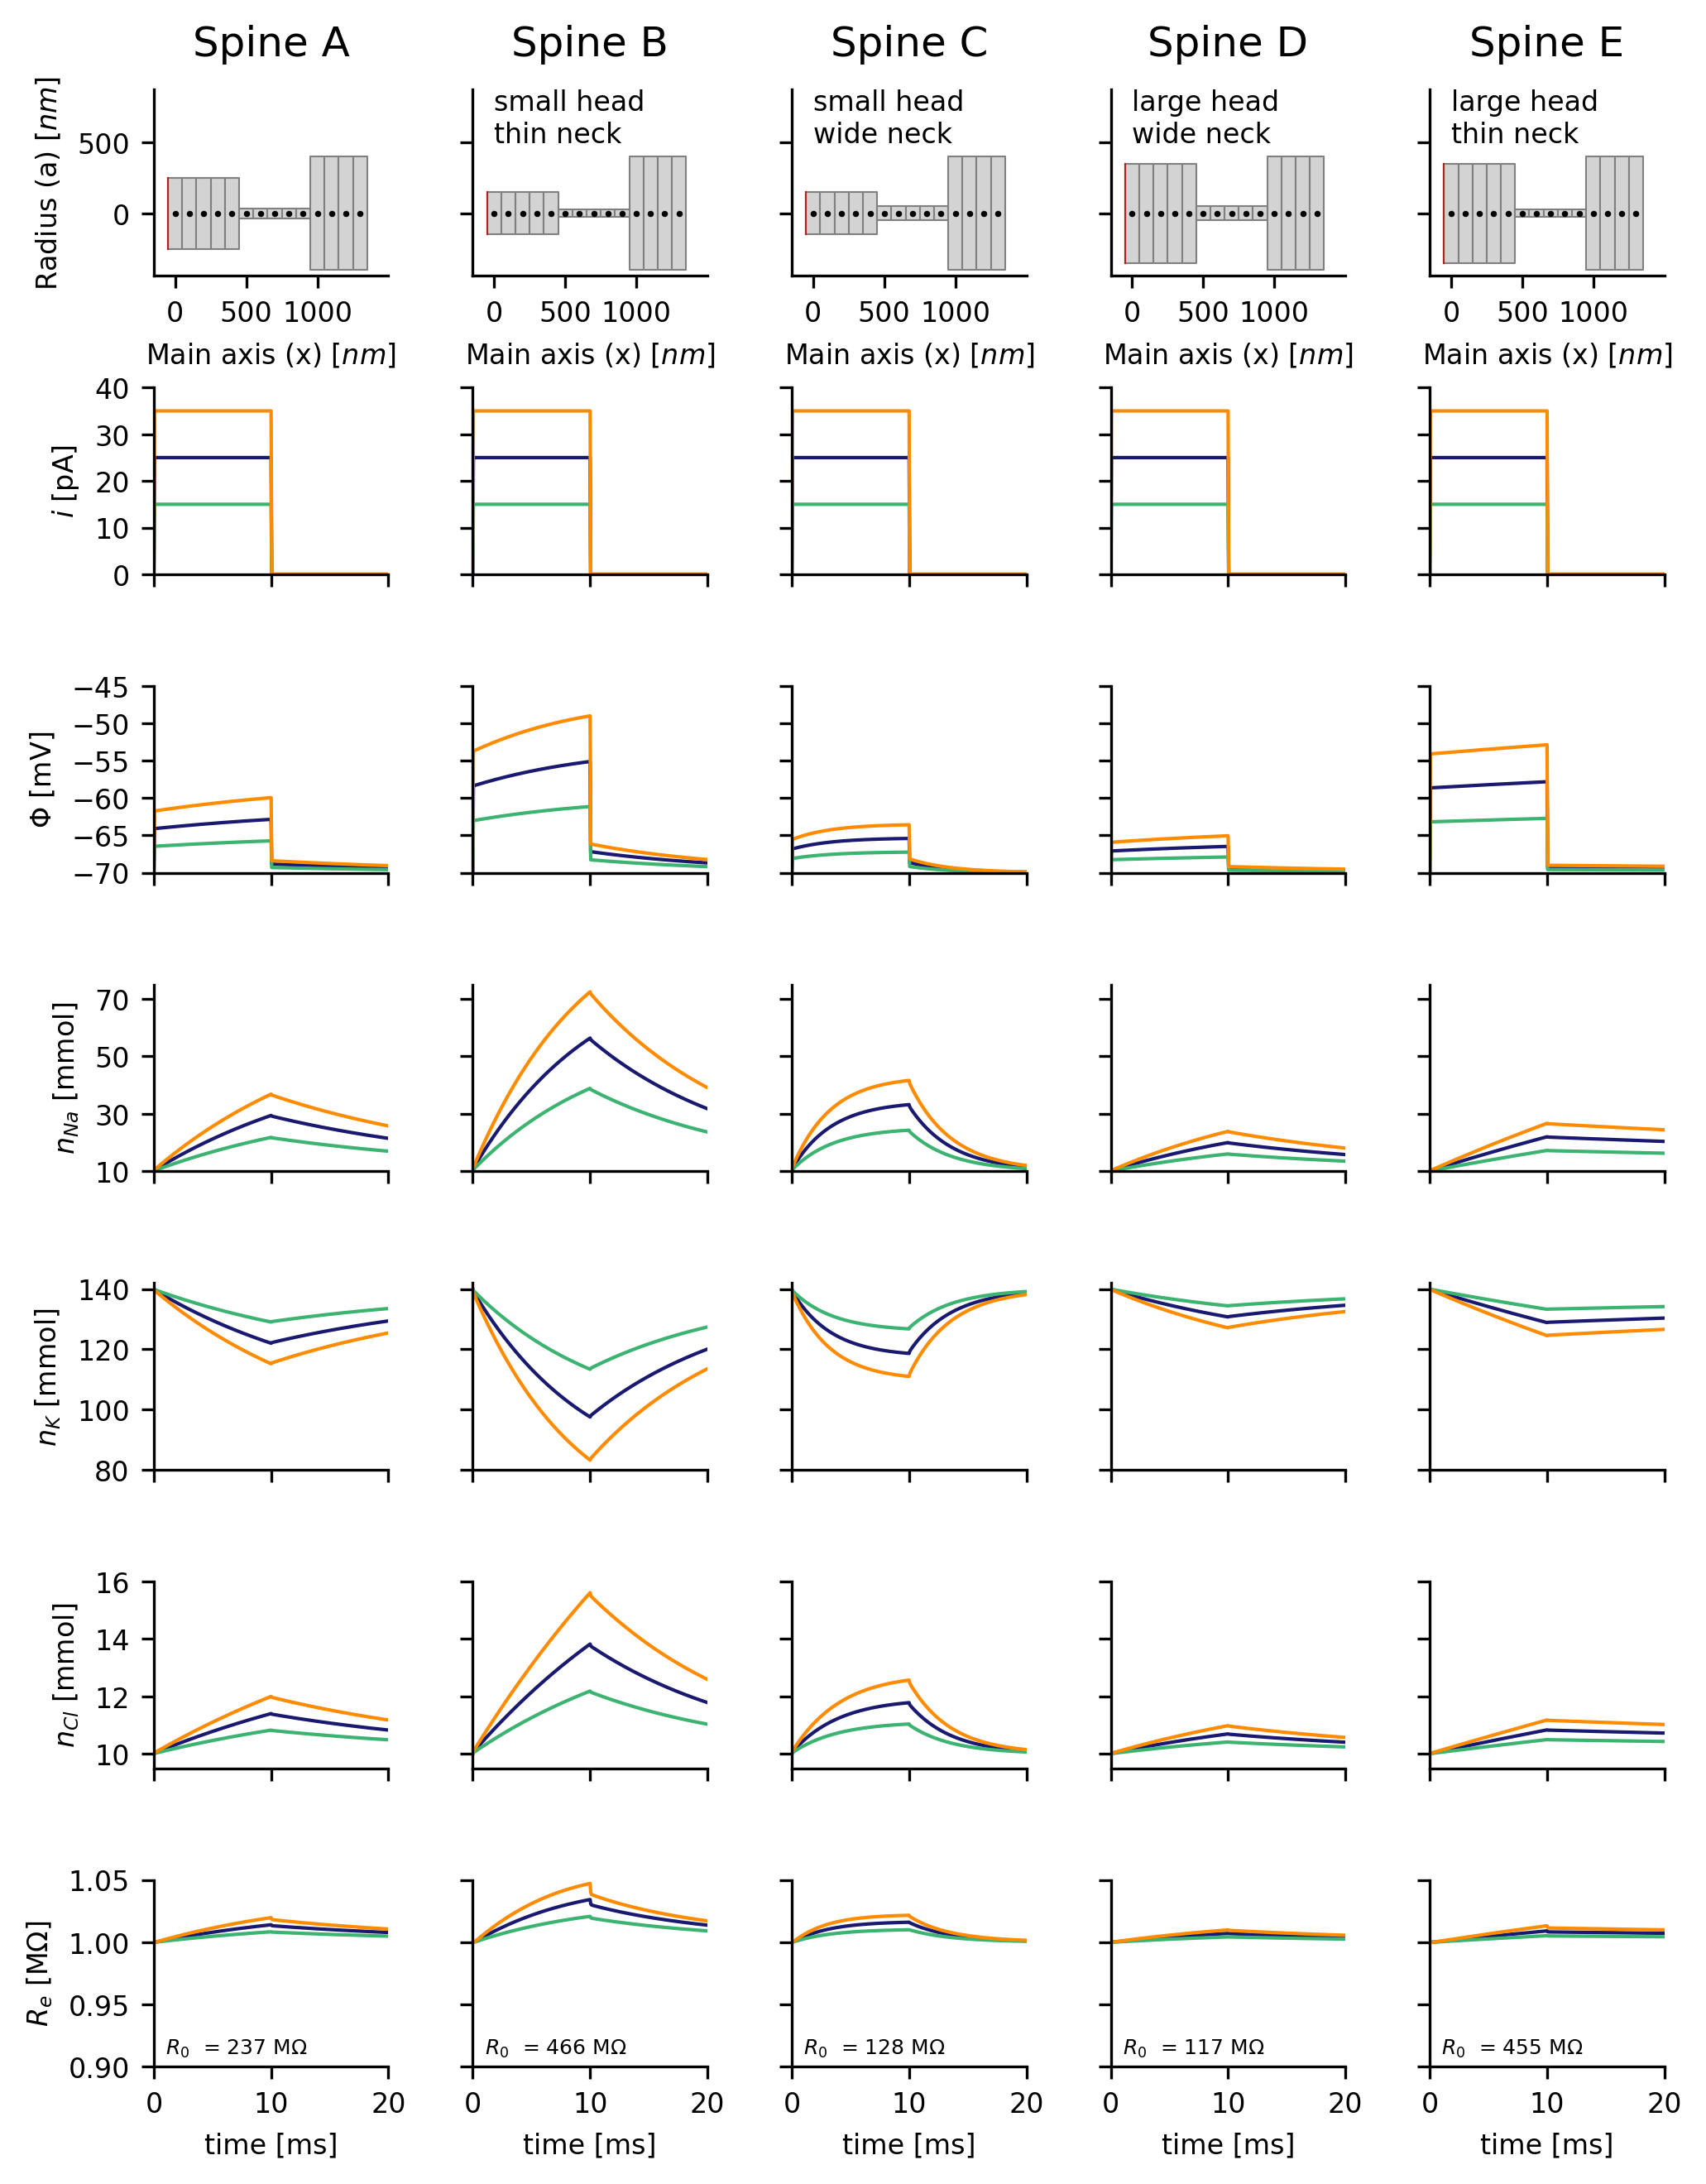

In [3]:
# equal diffusion
fig = plt.figure(dpi=300, figsize=(6.8,9))
margin_left = 0.03
dx = 0.05
n_columns = 5

plot.axs_head_overview(fig, column=1, n_columns=n_columns, file_id_list=['experiment_1', 'experiment_11','experiment_12',], make_y_label=True, margin_left=margin_left)
plot.axs_head_overview(fig, column=2, n_columns=n_columns, file_id_list=['experiment_28','experiment_29','experiment_30',], make_y_label=False, margin_left=margin_left, text='small head\nthin neck')
plot.axs_head_overview(fig, column=3, n_columns=n_columns, file_id_list=['experiment_19','experiment_20','experiment_21',], make_y_label=False, margin_left=margin_left, text='small head\nwide neck')    
plot.axs_head_overview(fig, column=4, n_columns=n_columns, file_id_list=['experiment_16','experiment_17','experiment_18',], make_y_label=False, margin_left=margin_left, text='large head\nwide neck')    
plot.axs_head_overview(fig, column=5, n_columns=n_columns, file_id_list=['experiment_31','experiment_32','experiment_33',], make_y_label=False, margin_left=margin_left, text='large head\nthin neck')    

wx = (1. - n_columns * dx - 0.5 * dx - margin_left) / n_columns
x_text = [margin_left+dx + 0.5 * wx + (wx + dx) * column for column in range(6)]

fig.text(x_text[0], 0.95, 'Spine A', fontsize=12, horizontalalignment='center')
fig.text(x_text[1], 0.95, 'Spine B', fontsize=12, horizontalalignment='center')
fig.text(x_text[2], 0.95, 'Spine C', fontsize=12, horizontalalignment='center')
fig.text(x_text[3], 0.95, 'Spine D', fontsize=12, horizontalalignment='center')
fig.text(x_text[4], 0.95, 'Spine E', fontsize=12, horizontalalignment='center')

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02.tif')

plt.show()

# Figure 2
    Membrane voltage, and ion concentrations in the spine head for different spines. Input current lasts 10 ms and is carried by sodium ions.
    Spine A)
    Spine B)
    Spine C)
    Spine D)
    Spine E)
    Spine F) Parmeters taken from Lagache et al. 2019. Diffusion constant for sodium, potassium and chlorid is indentical. Concentration of chloride is 150 mmol. In A-E) sodium diffusivity is reduced compared to potassium and chloride. Input resistance of spine drops instead of increases

/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:411: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' for yi in ax.get_yticks() * 1.e9])
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid valu

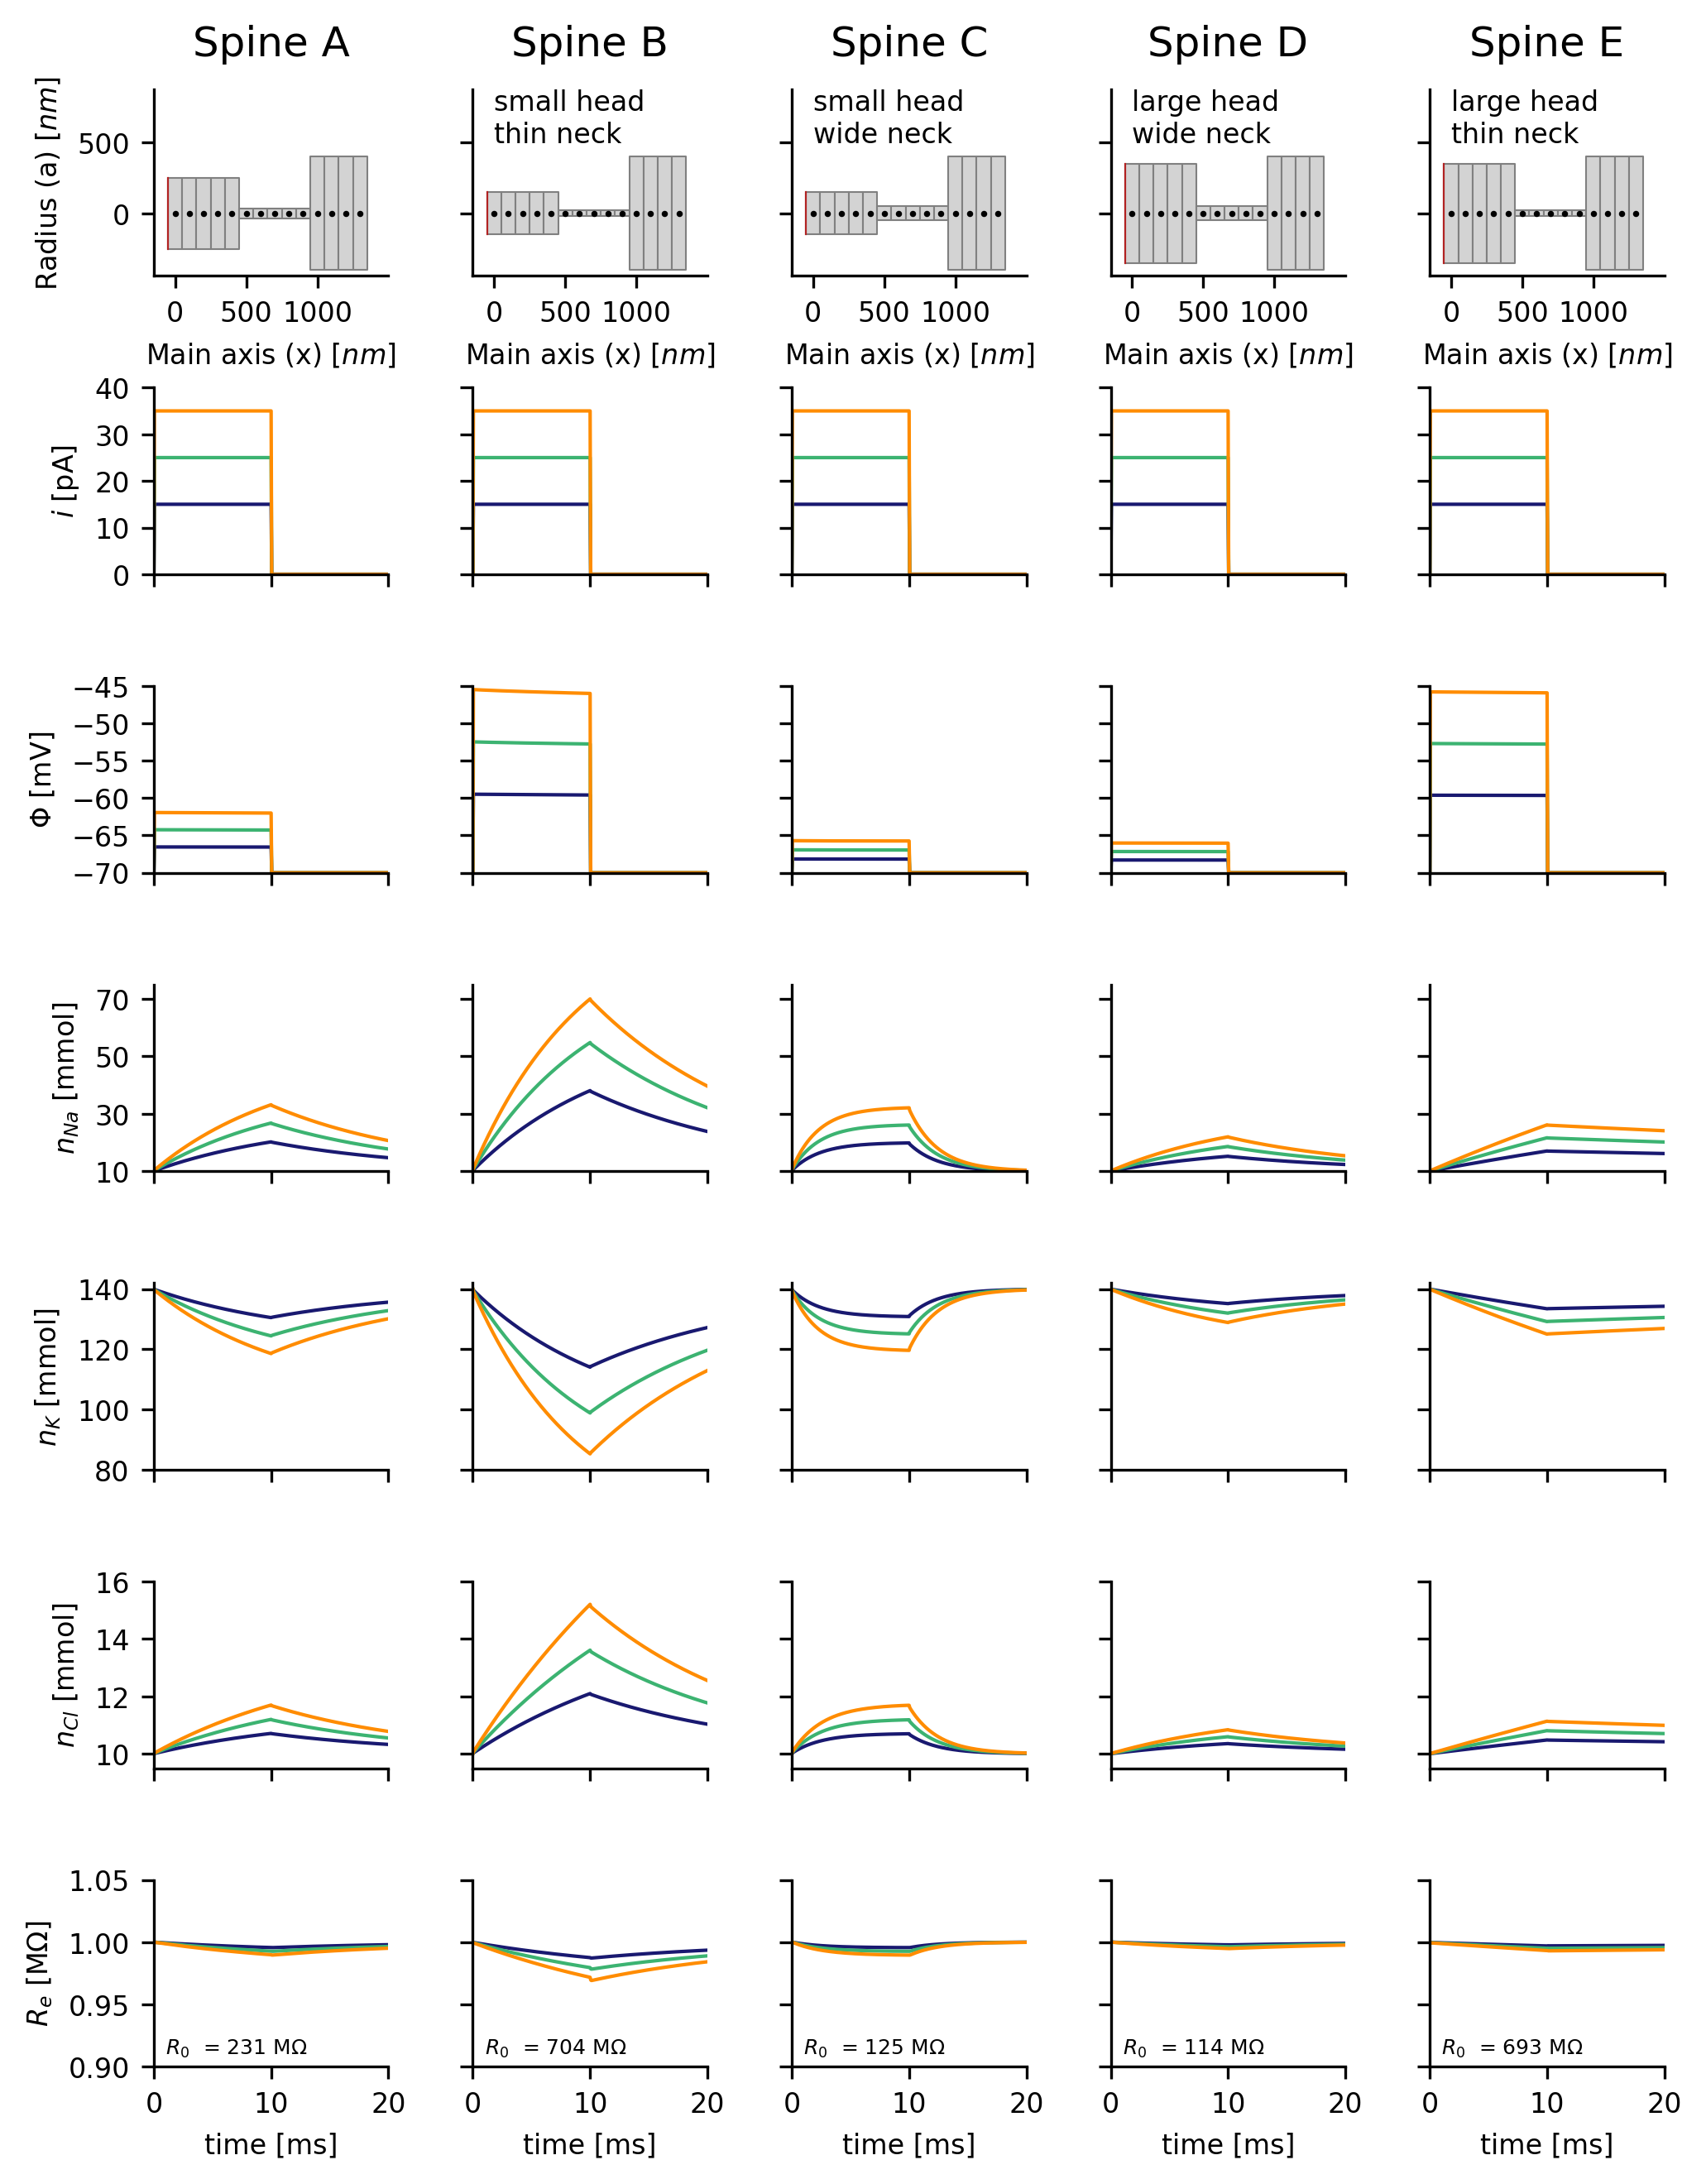

In [4]:
# equal diffusion
fig = plt.figure(dpi=300, figsize=(6.8,9))
margin_left = 0.03
dx = 0.05
n_columns = 5

plot.axs_head_overview(fig, column=1, n_columns=n_columns, file_id_list=['experiment_25','experiment_26','experiment_27',], make_y_label=True, margin_left=margin_left)
plot.axs_head_overview(fig, column=2, n_columns=n_columns, file_id_list=['experiment_56','experiment_57','experiment_58',], make_y_label=False, margin_left=margin_left, text='small head\nthin neck')
plot.axs_head_overview(fig, column=3, n_columns=n_columns, file_id_list=['experiment_62','experiment_63','experiment_64',], make_y_label=False, margin_left=margin_left, text='small head\nwide neck')    
plot.axs_head_overview(fig, column=4, n_columns=n_columns, file_id_list=['experiment_59','experiment_60','experiment_61',], make_y_label=False, margin_left=margin_left, text='large head\nwide neck')    
plot.axs_head_overview(fig, column=5, n_columns=n_columns, file_id_list=['experiment_65','experiment_66','experiment_67',], make_y_label=False, margin_left=margin_left, text='large head\nthin neck')    

wx = (1. - n_columns * dx - 0.5 * dx - margin_left) / n_columns
x_text = [margin_left+dx + 0.5 * wx + (wx + dx) * column for column in range(n_columns)]

fig.text(x_text[0], 0.95, 'Spine A', fontsize=12, horizontalalignment='center')
fig.text(x_text[1], 0.95, 'Spine B', fontsize=12, horizontalalignment='center')
fig.text(x_text[2], 0.95, 'Spine C', fontsize=12, horizontalalignment='center')
fig.text(x_text[3], 0.95, 'Spine D', fontsize=12, horizontalalignment='center')
fig.text(x_text[4], 0.95, 'Spine E', fontsize=12, horizontalalignment='center')

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_1.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_1.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_2.tif')

plt.show()


/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid value encountered in divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:411: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' for yi in ax.get_yticks() * 1.e9])
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:556: RuntimeWarning: invalid valu

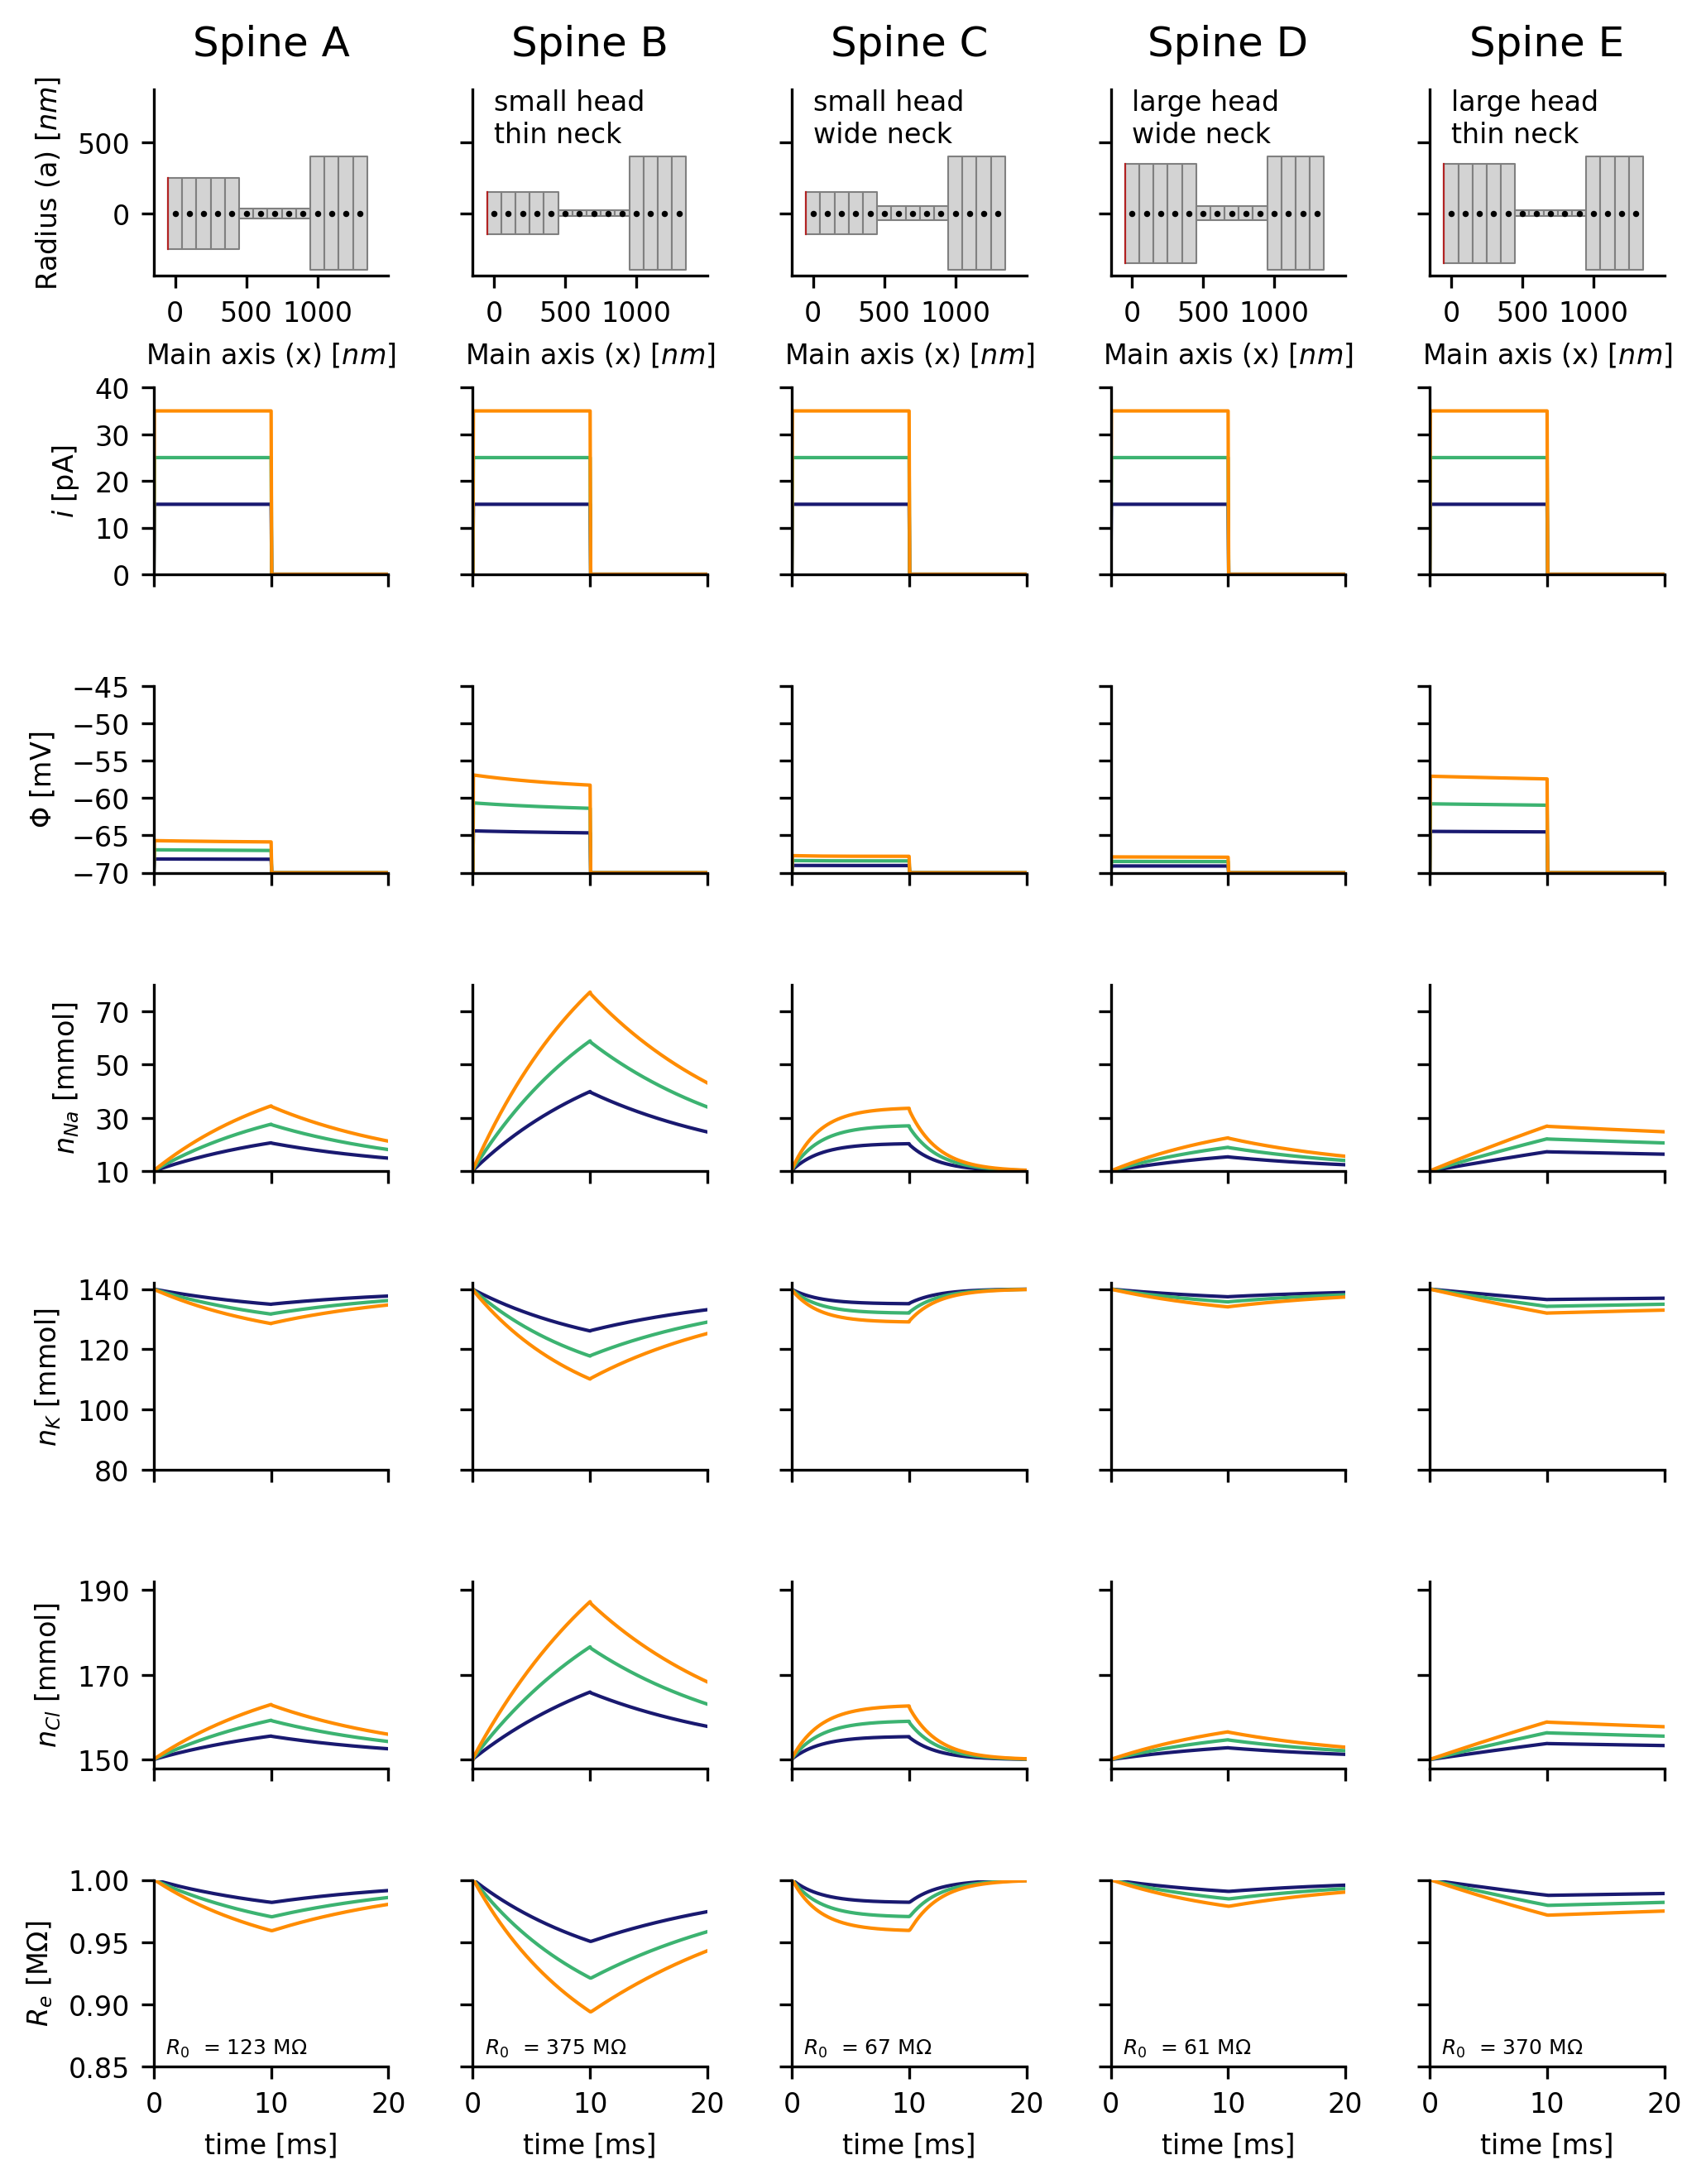

In [5]:
# equal diffusion
fig = plt.figure(dpi=300, figsize=(6.8,9))
margin_left = 0.03
dx = 0.05
n_columns = 5

plot.axs_head_overview(fig, column=1, n_columns=n_columns, file_id_list=['experiment_53','experiment_54','experiment_55',], make_y_label=True, margin_left=margin_left, ylimpreset='2')
plot.axs_head_overview(fig, column=2, n_columns=n_columns, file_id_list=['experiment_68','experiment_69','experiment_70',], make_y_label=False, margin_left=margin_left, ylimpreset='2', text='small head\nthin neck')
plot.axs_head_overview(fig, column=3, n_columns=n_columns, file_id_list=['experiment_74','experiment_75','experiment_76',], make_y_label=False, margin_left=margin_left, ylimpreset='2', text='small head\nwide neck')    
plot.axs_head_overview(fig, column=4, n_columns=n_columns, file_id_list=['experiment_71','experiment_72','experiment_73',], make_y_label=False, margin_left=margin_left, ylimpreset='2', text='large head\nwide neck')    
plot.axs_head_overview(fig, column=5, n_columns=n_columns, file_id_list=['experiment_77','experiment_78','experiment_79',], make_y_label=False, margin_left=margin_left, ylimpreset='2', text='large head\nthin neck')    

wx = (1. - n_columns * dx - 0.5 * dx - margin_left) / n_columns
x_text = [margin_left+dx + 0.5 * wx + (wx + dx) * column for column in range(n_columns)]

fig.text(x_text[0], 0.95, 'Spine A', fontsize=12, horizontalalignment='center')
fig.text(x_text[1], 0.95, 'Spine B', fontsize=12, horizontalalignment='center')
fig.text(x_text[2], 0.95, 'Spine C', fontsize=12, horizontalalignment='center')
fig.text(x_text[3], 0.95, 'Spine D', fontsize=12, horizontalalignment='center')
fig.text(x_text[4], 0.95, 'Spine E', fontsize=12, horizontalalignment='center')

plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_2.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_2.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/Figure02_2.tif')

plt.show()